In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics



In [2]:
df = pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
df=df.drop('Id',axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


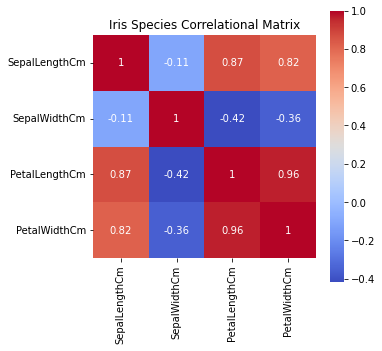

In [20]:
plt.figure(figsize=(5,5))
plt.title("Iris Species Correlational Matrix")
sns.heatmap(df.corr(), annot=True, square="True", cmap="coolwarm")
plt.show()

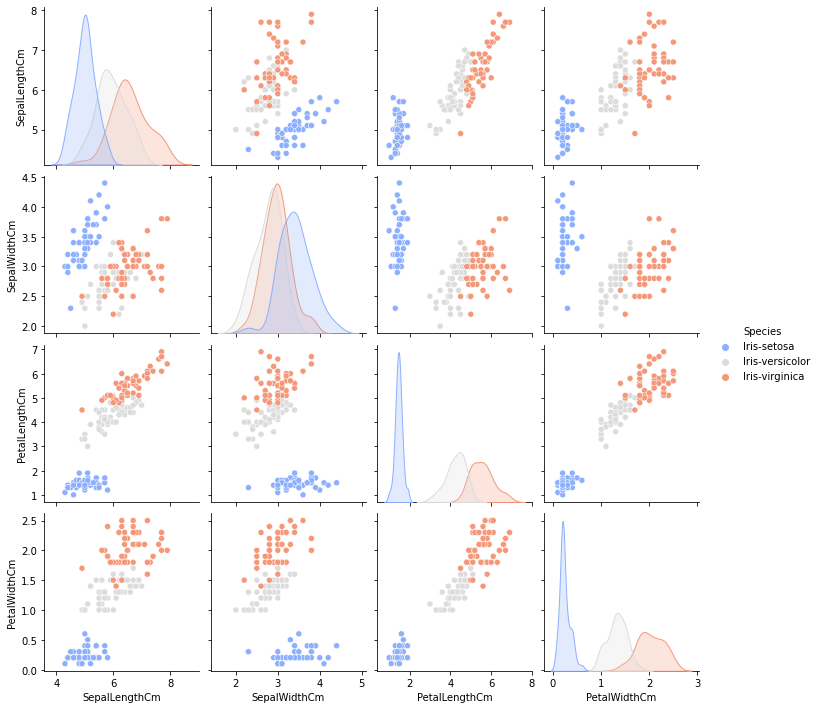

In [21]:
sns.pairplot(data=df, hue='Species', palette='coolwarm')
plt.show()

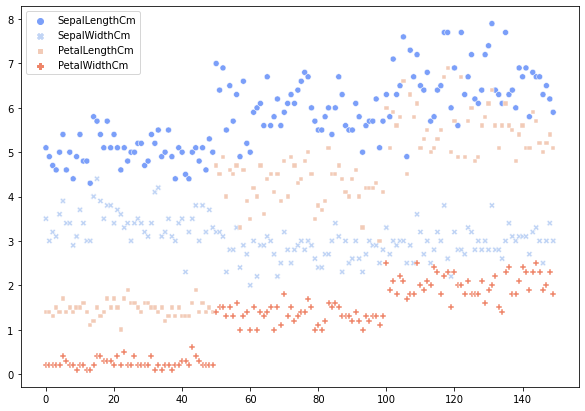

In [22]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, palette='coolwarm')
plt.show()

In [23]:
X = df.drop('Species', axis=1)
y = df['Species']
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (150, 4)
y shape:  (150,)


In [24]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y,
test_size=0.3, random_state=0)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (105, 4)
y_train shape:  (105,)
X_test shape:  (45, 4)
y_test shape:  (45,)


In [26]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
print("Training score: ",knn.score(X_train, y_train)*100)
print("Testing score: ",knn.score(X_test, y_test)*100)

Training score:  97.14285714285714
Testing score:  97.77777777777777


In [29]:
y_pred = knn.predict(X_test)

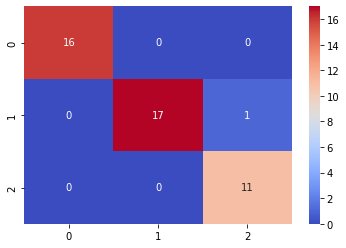

In [30]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

<AxesSubplot:>

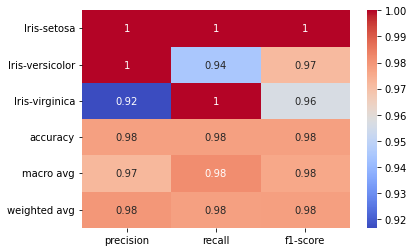

In [31]:
cr = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True, cmap='coolwarm')